## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  20.258477  1529.595790  0.986752  7.883246  1509.389538
1  59.298941   675.485672  0.044044  9.947604    66.239403
2  98.773507  1366.740276  0.578868  6.375093   797.287501
3  57.591701   552.676630  0.745683  9.883996   416.138262
4  98.153622   839.451759  0.344613  2.230640   305.588219


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9672270	total: 59ms	remaining: 59s
1:	learn: 0.9565420	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9454024	total: 60.1ms	remaining: 20s
3:	learn: 0.9340104	total: 60.5ms	remaining: 15.1s
4:	learn: 0.9217039	total: 61ms	remaining: 12.1s
5:	learn: 0.9115398	total: 61.5ms	remaining: 10.2s
6:	learn: 0.8977520	total: 62.1ms	remaining: 8.8s
7:	learn: 0.8855608	total: 62.6ms	remaining: 7.76s
8:	learn: 0.8746572	total: 63.2ms	remaining: 6.96s
9:	learn: 0.8630918	total: 63.7ms	remaining: 6.31s
10:	learn: 0.8520929	total: 64.1ms	remaining: 5.76s
11:	learn: 0.8384783	total: 64.6ms	remaining: 5.32s
12:	learn: 0.8273813	total: 65ms	remaining: 4.94s
13:	learn: 0.8157663	total: 65.4ms	remaining: 4.61s
14:	learn: 0.8046414	total: 65.9ms	remaining: 4.33s
15:	learn: 0.7949717	total: 66.3ms	remaining: 4.08s
16:	learn: 0.7847233	total: 66.8ms	remaining: 3.86s
17:	learn: 0.7769147	total: 67.3ms	remaining: 3.67s
18:	learn: 0.7688157	total: 67.9ms	remaining: 3.5s
19:	

113:	learn: 0.2662423	total: 107ms	remaining: 835ms
114:	learn: 0.2637813	total: 108ms	remaining: 831ms
115:	learn: 0.2615404	total: 108ms	remaining: 825ms
116:	learn: 0.2585464	total: 109ms	remaining: 820ms
117:	learn: 0.2559951	total: 109ms	remaining: 816ms
118:	learn: 0.2536436	total: 110ms	remaining: 811ms
119:	learn: 0.2514894	total: 110ms	remaining: 806ms
120:	learn: 0.2483998	total: 110ms	remaining: 801ms
121:	learn: 0.2465369	total: 111ms	remaining: 797ms
122:	learn: 0.2435386	total: 111ms	remaining: 793ms
123:	learn: 0.2415497	total: 112ms	remaining: 788ms
124:	learn: 0.2385439	total: 112ms	remaining: 785ms
125:	learn: 0.2366943	total: 113ms	remaining: 782ms
126:	learn: 0.2343342	total: 113ms	remaining: 778ms
127:	learn: 0.2321110	total: 114ms	remaining: 774ms
128:	learn: 0.2299262	total: 114ms	remaining: 770ms
129:	learn: 0.2283346	total: 114ms	remaining: 765ms
130:	learn: 0.2263389	total: 115ms	remaining: 761ms
131:	learn: 0.2243404	total: 115ms	remaining: 757ms
132:	learn: 

291:	learn: 0.0672395	total: 186ms	remaining: 450ms
292:	learn: 0.0668717	total: 186ms	remaining: 449ms
293:	learn: 0.0666017	total: 187ms	remaining: 448ms
294:	learn: 0.0663381	total: 187ms	remaining: 448ms
295:	learn: 0.0660665	total: 188ms	remaining: 448ms
296:	learn: 0.0658069	total: 189ms	remaining: 447ms
297:	learn: 0.0655518	total: 189ms	remaining: 446ms
298:	learn: 0.0651121	total: 189ms	remaining: 444ms
299:	learn: 0.0648288	total: 190ms	remaining: 443ms
300:	learn: 0.0644345	total: 190ms	remaining: 442ms
301:	learn: 0.0641875	total: 191ms	remaining: 441ms
302:	learn: 0.0637040	total: 191ms	remaining: 440ms
303:	learn: 0.0634525	total: 192ms	remaining: 440ms
304:	learn: 0.0631644	total: 193ms	remaining: 439ms
305:	learn: 0.0629278	total: 193ms	remaining: 438ms
306:	learn: 0.0626500	total: 193ms	remaining: 436ms
307:	learn: 0.0624100	total: 194ms	remaining: 436ms
308:	learn: 0.0620076	total: 194ms	remaining: 434ms
309:	learn: 0.0617829	total: 194ms	remaining: 433ms
310:	learn: 

542:	learn: 0.0220669	total: 290ms	remaining: 244ms
543:	learn: 0.0219517	total: 290ms	remaining: 243ms
544:	learn: 0.0218713	total: 291ms	remaining: 243ms
545:	learn: 0.0218314	total: 291ms	remaining: 242ms
546:	learn: 0.0217191	total: 292ms	remaining: 242ms
547:	learn: 0.0216386	total: 292ms	remaining: 241ms
548:	learn: 0.0215999	total: 293ms	remaining: 240ms
549:	learn: 0.0214907	total: 293ms	remaining: 240ms
550:	learn: 0.0214135	total: 294ms	remaining: 239ms
551:	learn: 0.0213758	total: 294ms	remaining: 239ms
552:	learn: 0.0212646	total: 295ms	remaining: 238ms
553:	learn: 0.0211554	total: 295ms	remaining: 237ms
554:	learn: 0.0210480	total: 295ms	remaining: 237ms
555:	learn: 0.0209554	total: 296ms	remaining: 236ms
556:	learn: 0.0208820	total: 296ms	remaining: 235ms
557:	learn: 0.0207913	total: 297ms	remaining: 235ms
558:	learn: 0.0207020	total: 297ms	remaining: 234ms
559:	learn: 0.0205987	total: 297ms	remaining: 234ms
560:	learn: 0.0205120	total: 298ms	remaining: 233ms
561:	learn: 

709:	learn: 0.0107000	total: 368ms	remaining: 150ms
710:	learn: 0.0106549	total: 368ms	remaining: 150ms
711:	learn: 0.0105940	total: 369ms	remaining: 149ms
712:	learn: 0.0105488	total: 369ms	remaining: 149ms
713:	learn: 0.0105295	total: 370ms	remaining: 148ms
714:	learn: 0.0105107	total: 370ms	remaining: 148ms
715:	learn: 0.0104648	total: 370ms	remaining: 147ms
716:	learn: 0.0104219	total: 371ms	remaining: 146ms
717:	learn: 0.0103772	total: 371ms	remaining: 146ms
718:	learn: 0.0103333	total: 371ms	remaining: 145ms
719:	learn: 0.0103151	total: 372ms	remaining: 145ms
720:	learn: 0.0102971	total: 372ms	remaining: 144ms
721:	learn: 0.0102322	total: 373ms	remaining: 144ms
722:	learn: 0.0102147	total: 373ms	remaining: 143ms
723:	learn: 0.0101720	total: 374ms	remaining: 142ms
724:	learn: 0.0101288	total: 374ms	remaining: 142ms
725:	learn: 0.0100971	total: 374ms	remaining: 141ms
726:	learn: 0.0100551	total: 375ms	remaining: 141ms
727:	learn: 0.0100112	total: 375ms	remaining: 140ms
728:	learn: 

958:	learn: 0.0049153	total: 472ms	remaining: 20.2ms
959:	learn: 0.0048975	total: 472ms	remaining: 19.7ms
960:	learn: 0.0048746	total: 472ms	remaining: 19.2ms
961:	learn: 0.0048504	total: 473ms	remaining: 18.7ms
962:	learn: 0.0048338	total: 473ms	remaining: 18.2ms
963:	learn: 0.0048157	total: 474ms	remaining: 17.7ms
964:	learn: 0.0047994	total: 474ms	remaining: 17.2ms
965:	learn: 0.0047779	total: 474ms	remaining: 16.7ms
966:	learn: 0.0047568	total: 475ms	remaining: 16.2ms
967:	learn: 0.0047362	total: 475ms	remaining: 15.7ms
968:	learn: 0.0047161	total: 476ms	remaining: 15.2ms
969:	learn: 0.0047016	total: 476ms	remaining: 14.7ms
970:	learn: 0.0046819	total: 477ms	remaining: 14.2ms
971:	learn: 0.0046610	total: 477ms	remaining: 13.7ms
972:	learn: 0.0046446	total: 477ms	remaining: 13.2ms
973:	learn: 0.0046283	total: 478ms	remaining: 12.8ms
974:	learn: 0.0046122	total: 478ms	remaining: 12.3ms
975:	learn: 0.0045920	total: 479ms	remaining: 11.8ms
976:	learn: 0.0045795	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

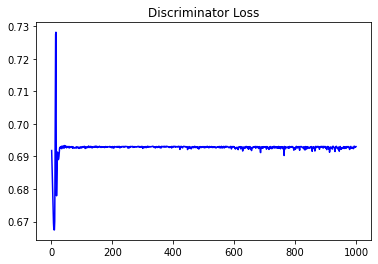

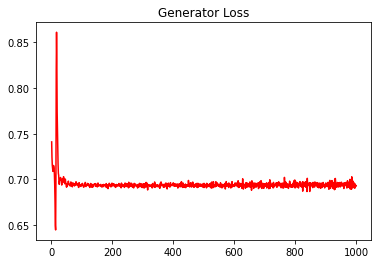

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005157513996196415


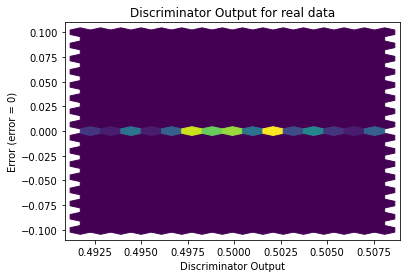

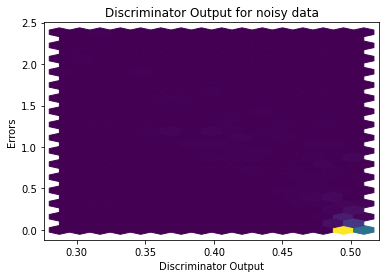

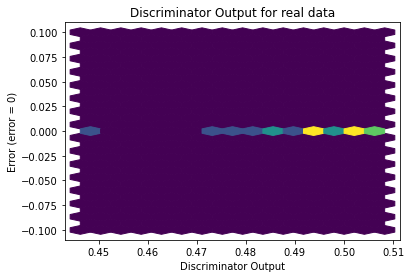

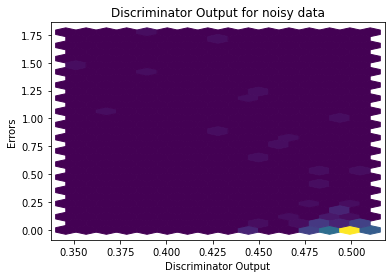

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


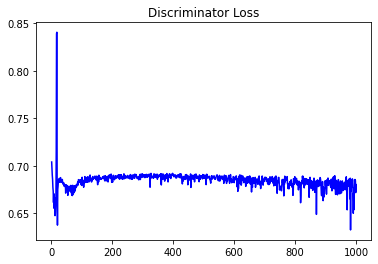

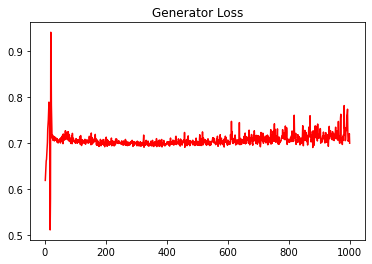

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005797268993737361


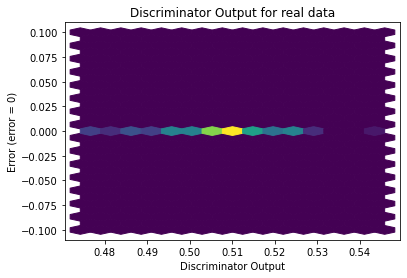

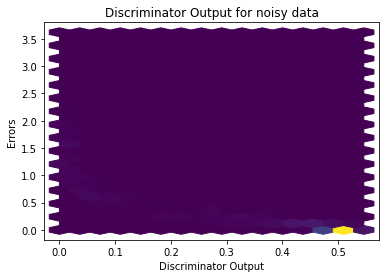

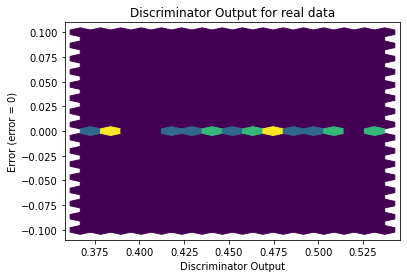

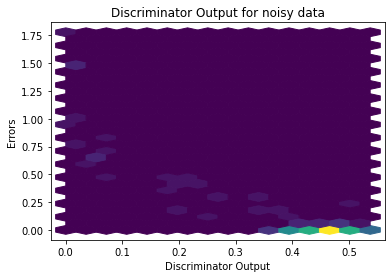

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1082]], requires_grad=True)
